In [ ]:
# Importing library
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [ ]:
data_path = '/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/dataset'

categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

data = pd.DataFrame()

for i,cat in enumerate(categories):
  folder_path = os.path.join(data_path, cat)
  img_names = os.listdir(folder_path)

  for img in img_names:
    img = os.path.join(folder_path, img)
    img = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(gray,(100,100))
    img = img.flatten()
    img = np.reshape(img,(-1,img.size))
    data = data.append(pd.DataFrame(img, index= [i]))
data.reset_index(inplace= True) 
data.to_csv('/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/dataset.csv')
data

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,232,232,232,232,232,232,232,232,232,232,232,232,230,230,230,230,229,229,229,229,229,229,229,229,229,230,230,231,232,230,230,230,230,232,232,232,232,231,231,...,121,83,52,52,46,76,128,160,142,135,147,175,186,168,135,147,116,70,60,67,111,209,197,161,232,234,207,148,187,121,115,117,122,128,109,39,37,38,155,207
1,0,255,255,255,255,255,255,255,254,255,255,255,255,255,253,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,255,...,203,199,191,188,168,92,65,79,86,87,89,88,83,85,71,74,73,65,69,102,110,100,111,108,97,97,90,94,90,88,89,83,76,87,75,70,3,0,209,254
2,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,14,4,10,10,2,8,10,2,10,12,0,8,13,4,12,16,5,17,12,8,11,9,13,17,5,23,18,21,5,18,31,5,25,19,5,18,12,4,2,1
3,0,255,255,254,254,254,254,254,254,254,252,254,254,254,253,253,253,253,254,253,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,68,44,22,242,246,253,254,255,255,255,254,251,235,96,121,131,135,130,114,93,106,117,132,135,135,154,145,141,145,135,140,164,158,138,125,125,254,255,255,255
4,0,244,242,240,241,242,240,242,242,243,244,238,225,167,167,178,241,242,242,242,242,241,240,240,170,170,174,227,241,239,242,242,241,241,240,240,244,222,213,217,...,189,189,185,191,189,188,186,182,177,174,174,168,166,162,157,152,135,128,103,90,81,82,66,82,69,60,65,55,41,66,57,57,40,29,34,47,61,43,73,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,6,4,79,147,147,147,146,145,145,...,50,58,59,62,64,63,63,34,2,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1372,1,119,120,118,118,119,120,123,123,127,130,130,131,131,133,132,130,127,125,125,124,126,126,124,123,125,126,129,133,132,146,134,136,134,155,157,183,201,210,200,...,101,58,70,58,43,66,59,34,48,50,39,39,30,32,26,11,37,28,23,19,33,32,44,27,37,21,38,34,28,37,22,51,39,47,40,37,29,31,45,54
1373,1,249,249,249,248,248,248,248,248,248,248,248,248,248,248,248,248,247,247,247,247,247,247,247,247,246,246,246,246,246,246,246,246,246,245,245,245,245,245,245,...,124,107,114,115,123,128,116,122,182,114,113,112,117,175,118,104,102,101,144,121,91,94,97,137,133,80,81,90,95,99,99,103,167,157,102,98,96,100,103,107
1374,1,200,201,202,203,202,201,198,175,142,85,26,16,18,16,14,13,12,12,12,12,16,17,18,17,16,17,15,13,16,17,31,41,37,36,22,28,27,28,20,...,184,207,173,173,182,252,255,255,255,253,249,246,240,233,228,26,13,28,23,23,23,24,21,18,18,19,20,20,20,21,24,18,17,12,21,23,20,21,19,19


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/dataset.csv')
df

,Unnamed: 0,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,232,232,232,232,232,232,232,232,232,232,232,232,230,230,230,230,229,229,229,229,229,229,229,229,229,230,230,231,232,230,230,230,230,232,232,232,232,231,...,121,83,52,52,46,76,128,160,142,135,147,175,186,168,135,147,116,70,60,67,111,209,197,161,232,234,207,148,187,121,115,117,122,128,109,39,37,38,155,207
1,1,0,255,255,255,255,255,255,255,254,255,255,255,255,255,253,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,...,203,199,191,188,168,92,65,79,86,87,89,88,83,85,71,74,73,65,69,102,110,100,111,108,97,97,90,94,90,88,89,83,76,87,75,70,3,0,209,254
2,2,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,14,4,10,10,2,8,10,2,10,12,0,8,13,4,12,16,5,17,12,8,11,9,13,17,5,23,18,21,5,18,31,5,25,19,5,18,12,4,2,1
3,3,0,255,255,254,254,254,254,254,254,254,252,254,254,254,253,253,253,253,254,253,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,68,44,22,242,246,253,254,255,255,255,254,251,235,96,121,131,135,130,114,93,106,117,132,135,135,154,145,141,145,135,140,164,158,138,125,125,254,255,255,255
4,4,0,244,242,240,241,242,240,242,242,243,244,238,225,167,167,178,241,242,242,242,242,241,240,240,170,170,174,227,241,239,242,242,241,241,240,240,244,222,213,...,189,189,185,191,189,188,186,182,177,174,174,168,166,162,157,152,135,128,103,90,81,82,66,82,69,60,65,55,41,66,57,57,40,29,34,47,61,43,73,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,1371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,6,4,79,147,147,147,146,145,...,50,58,59,62,64,63,63,34,2,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1372,1372,1,119,120,118,118,119,120,123,123,127,130,130,131,131,133,132,130,127,125,125,124,126,126,124,123,125,126,129,133,132,146,134,136,134,155,157,183,201,210,...,101,58,70,58,43,66,59,34,48,50,39,39,30,32,26,11,37,28,23,19,33,32,44,27,37,21,38,34,28,37,22,51,39,47,40,37,29,31,45,54
1373,1373,1,249,249,249,248,248,248,248,248,248,248,248,248,248,248,248,248,247,247,247,247,247,247,247,247,246,246,246,246,246,246,246,246,246,245,245,245,245,245,...,124,107,114,115,123,128,116,122,182,114,113,112,117,175,118,104,102,101,144,121,91,94,97,137,133,80,81,90,95,99,99,103,167,157,102,98,96,100,103,107
1374,1374,1,200,201,202,203,202,201,198,175,142,85,26,16,18,16,14,13,12,12,12,12,16,17,18,17,16,17,15,13,16,17,31,41,37,36,22,28,27,28,...,184,207,173,173,182,252,255,255,255,253,249,246,240,233,228,26,13,28,23,23,23,24,21,18,18,19,20,20,20,21,24,18,17,12,21,23,20,21,19,19


In [ ]:
train = df.iloc[:,2:]
label = df.iloc[:,1]

train_x, test_x, train_y, test_y = train_test_split(train, label, random_state = 2, test_size = 0.2)

In [ ]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
600,255,255,255,255,255,254,170,253,255,254,254,254,254,254,254,255,255,255,255,255,254,255,254,254,105,252,254,254,254,254,255,255,254,255,254,254,255,255,255,255,...,84,87,91,92,90,99,109,107,113,118,114,121,112,115,77,13,18,20,26,55,22,11,31,31,47,40,32,45,36,41,41,32,27,59,16,14,253,253,255,255
677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,2,2,4,0,14,44,59,57,52,47,43,...,91,95,93,86,83,52,19,2,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519,233,233,233,233,233,233,233,233,233,232,213,72,47,48,51,114,156,119,108,117,149,165,118,80,57,48,53,49,58,58,109,102,57,58,57,54,61,59,77,111,...,117,116,112,115,113,117,113,111,113,120,119,117,120,117,115,115,113,114,112,114,111,111,111,108,108,108,105,104,97,97,90,81,71,71,79,64,50,51,52,58
1033,253,253,253,250,252,252,252,252,253,253,252,252,252,253,253,252,252,252,253,253,254,254,254,253,253,253,253,253,253,253,253,252,253,253,253,253,253,253,254,254,...,157,157,154,139,144,142,139,138,141,141,141,148,147,147,142,141,137,137,138,140,137,130,127,124,123,120,109,107,108,109,113,236,185,169,180,207,222,213,204,210
476,217,216,216,216,220,220,221,222,220,220,220,220,218,218,218,217,217,217,217,216,216,216,216,214,213,213,213,212,212,212,212,207,207,207,207,205,204,204,203,200,...,202,169,118,36,27,31,35,42,36,35,52,70,75,66,61,40,29,37,76,245,254,249,248,211,47,47,45,47,49,51,49,49,49,49,45,45,45,43,42,45


In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(1100, 10000) (1100,) (276, 10000) (276,)


In [ ]:
train_y

600     0
677     0
519     0
1033    1
476     0
       ..
466     0
299     0
493     0
527     0
1192    1
Name: index, Length: 1100, dtype: int64

In [ ]:
# Normalization
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [ ]:
target = to_categorical(train_y.unique())
target

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
(train_y.shape, test_y.shape)

((1100, 2), (276, 2))

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train_x = train_x.values.reshape(-1,100,100,1)
test_x = test_x.values.reshape(-1,100,100,1)
(train_x.shape, test_x.shape)

((1100, 100, 100, 1), (276, 100, 100, 1))

# Model Creation

In [ ]:
model = Sequential()

#1st layer
model.add(Conv2D(100, kernel_size= 5, input_shape=(100,100,1), activation='relu', padding='same'))
MaxPool2D(pool_size = 2)

#2nd layer
model.add(Conv2D(100, kernel_size = 3, activation = 'relu', padding='same'))
MaxPool2D(pool_size = 2)

#3rd layer
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding='same'))
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(10, kernel_size = 3, activation = 'relu', padding='same'))
MaxPool2D(pool_size = 2)

#fully connected classifier
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 100)     2600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 100)     90100     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 50)      45050     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 50)      22550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 50)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 10)      4510      
_________________________________________________________________
flatten_2 (Flatten)          (None, 100000)           

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y),shuffle = True)

Train on 1100 samples, validate on 276 samples
Epoch 1/20
1100/1100 [==============================] - 5s 4ms/step - loss: 0.8429 - accuracy: 0.5609 - val_loss: 0.6936 - val_accuracy: 0.4891
Epoch 2/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.5423 - accuracy: 0.7200 - val_loss: 0.4506 - val_accuracy: 0.8551
Epoch 3/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.3468 - accuracy: 0.8745 - val_loss: 0.3253 - val_accuracy: 0.9094
Epoch 4/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2332 - accuracy: 0.9227 - val_loss: 0.2473 - val_accuracy: 0.9239
Epoch 5/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.1866 - accuracy: 0.9436 - val_loss: 0.1754 - val_accuracy: 0.9529
Epoch 6/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2064 - accuracy: 0.9391 - val_loss: 0.2079 - val_accuracy: 0.9239
Epoch 7/20
1100/1100 [==============================] - 4s 4ms/step - loss: 0.1245 - accu

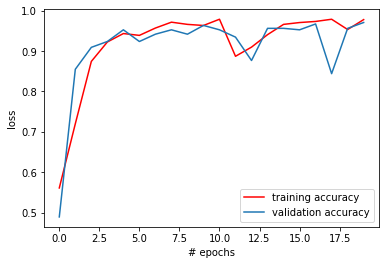

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

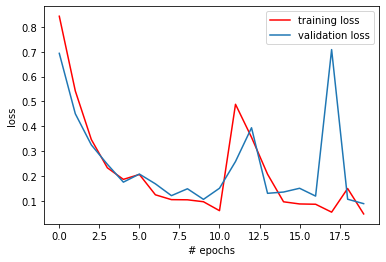

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_x,test_y))

276/276 [==============================] - 0s 1ms/step
[0.08887137580608977, 0.9710144996643066]


In [ ]:
from keras.models import model_from_json

#saving the model
model_json = model.to_json()
with open('/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/model.json', 'w') as json_file:
  json_file.write(model_json)

#serialize weights to JSON
model.save_weights('/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/model.h5')

In [ ]:
from keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open('model.yaml', 'w') as yaml_file:
  yaml_file.write(model_yaml)

#serialize weights to JSON
model.save_weights('/content/drive/My Drive/Face Mask Detector-20200702T112631Z-001.zip (Unzipped Files)/Face Mask Detector/model_yaml.h5')

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf

In [ ]:
def build_model(hp):
  model1 = Sequential()
  model1.add(Conv2D(filters=hp.Int('conv_1_filter', min_value = 50, max_value = 150,step = 10),
                    kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
                    activation = 'relu',
                    input_shape = (100,100,1)))
  model1.add(Conv2D(filters=hp.Int('conv_2_filter', min_value = 25, max_value = 105, step = 10),
                    kernel_size= hp.Choice('conv_2_kernel', values = [3,5]),
                    activation = 'relu'))
  model1.add(Flatten())
  model1.add(Dense(units = hp.Int('dense_units_1', min_value = 150, max_value = 300, step = 10),
                   activation = 'relu'))
  model1.add(Dense(2, activation = 'softmax'))
  
  model1.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  return model1

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'output', project_name = 'name')

RuntimeError: ignored

In [ ]:
from keras.models import model_from_json

json_file = open()